In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

## 1. Assignment 1 (4 scores)

Use Numpy only to construct the Logistic Regression model.

Train that Logistic Regression model dataset using the Gradient Descend approach on the Predict students’ dropout and academic success dataset. Note that three class in this dataset must be merge into two class as: graduate and non-graduate (dropout or enroll).

Evaluate that Logistic Regression model on the Predict students’ dropout and academic success dataset.

Visualize the loss function of the training process.

In [3]:
df = pd.read_csv('./data/data.csv', sep = ';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [4]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [5]:
df['Target'] = df['Target'].replace({'Dropout': 'non-graduate'})
df['Target'] = df['Target'].replace({'Enrolled': 'non-graduate'})

df['Target'] = df['Target'].replace({'Graduate': 'graduate'})

In [6]:
df['Target'] = df['Target'].replace({'graduate': 1})
df['Target'] = df['Target'].replace({'non-graduate': 0})

C:\Users\TGDD_LEANOVO\AppData\Local\Temp\ipykernel_12452\349868812.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Target'] = df['Target'].replace({'non-graduate': 0})


In [7]:
df['Target'].unique()

array([0, 1])

Build a `LogRegression` class.

In [15]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []
    
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _binary_cross_entropy(self, y, y_pred):
        # Avoid log(0) errors
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.n_iterations):
            # Forward pass
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_model)
            
            # Compute loss
            loss = self._binary_cross_entropy(y, y_pred)
            self.loss_history.append(loss)
            
            # Backward pass (compute gradients)
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)
    
    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

In [18]:
X = df.drop(columns=['Target'])
Y = df['Target']
X = np.hstack([np.ones((X.shape[0], 1)), X])

In [19]:
X_train, X_temp, y_train, y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [20]:
X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)

In [21]:
model = LogisticRegression(learning_rate=0.1, n_iterations=1000)
model.fit(X_train, y_train)

C:\Users\TGDD_LEANOVO\AppData\Local\Temp\ipykernel_12452\196031468.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\TGDD_LEANOVO\AppData\Local\Temp\ipykernel_12452\196031468.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\TGDD_LEANOVO\AppData\Local\Temp\ipykernel_12452\196031468.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\TGDD_LEANOVO\AppData\Local\Temp\ipykernel_12452\196031468.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\TGDD_LEANOVO\AppData\Local\Temp\ipykernel_12452\196031468.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\TGDD_LEANOVO\AppData\Local\Temp\ipykernel_12452\196031468.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
C:\Users\TGDD_LEANOVO\AppData\Local\Temp\ipykernel_12452\196031468.py:10: RuntimeWarning: overflow encountered i

In [22]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_acc = accuracy(y_train, y_train_pred)
test_acc = accuracy(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 0.4939
Test Accuracy: 0.5372


C:\Users\TGDD_LEANOVO\AppData\Local\Temp\ipykernel_12452\196031468.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


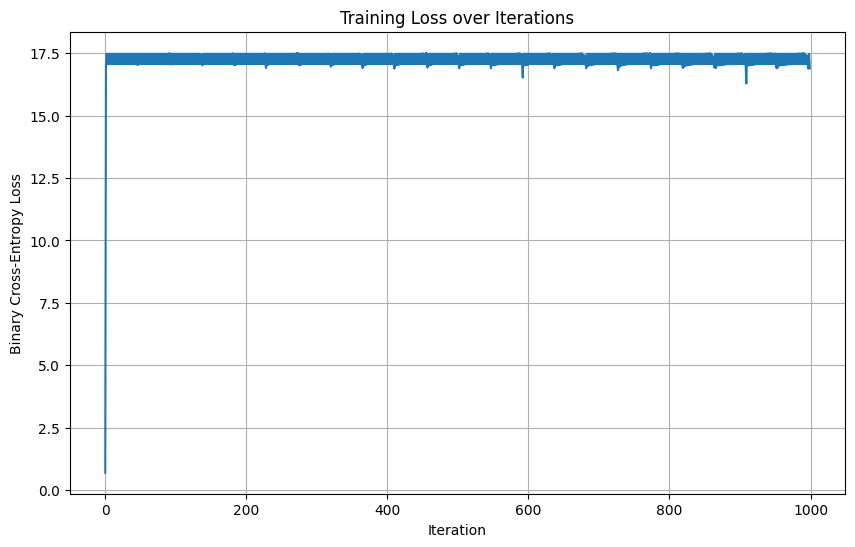

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(model.loss_history)), model.loss_history)
plt.title("Training Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.show()

### Assignment 2 (4 scores):

- Use Numpy only to construct the Sofmax Regression model.
- Train that Logistic Regression model dataset using the Gradient Descend approach on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Evaluate that Logistic Regression model on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Visualize the loss function of the training process.

## Assignment 3 (2 scores):

- Use a Machine Learning library (Scikit Learn or Skorch) to implement and evaluate the Logistic Regression on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.
- Use a Machine Learning library (Scikit Learn or Skorch) to implement and evaluate the Softmax Regression on the [Predict students’ dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) dataset.

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
log_reg = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

y_test_predict = log_reg.predict(X_test)

print("Logistic Regression (Binary Classification) Results:")
print("Accuracy:", accuracy_score(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict, target_names=['Non-graduate', 'Graduate']))

Logistic Regression (Binary Classification) Results:
Accuracy: 0.8058690744920993
              precision    recall  f1-score   support

Non-graduate       0.87      0.76      0.81       238
    Graduate       0.75      0.86      0.80       205

    accuracy                           0.81       443
   macro avg       0.81      0.81      0.81       443
weighted avg       0.81      0.81      0.81       443



In [85]:
tempdf = pd.read_csv('./data/data.csv', sep = ';')
tempdf['Target']

0        Dropout
1       Graduate
2        Dropout
3       Graduate
4       Graduate
          ...   
4419    Graduate
4420     Dropout
4421     Dropout
4422    Graduate
4423    Graduate
Name: Target, Length: 4424, dtype: object

In [86]:
X_multi = df.drop(columns=['Target'])
Y_multi = tempdf['Target']

print("Original class distribution:")
print(Y_multi.value_counts())

class_mapping = {'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}
Y_multi_numeric = Y_multi.replace(class_mapping)

Original class distribution:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


C:\Users\TGDD_LEANOVO\AppData\Local\Temp\ipykernel_12452\1066693575.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_multi_numeric = Y_multi.replace(class_mapping)


np.int64(0)

In [87]:
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(
    X_multi, Y_multi_numeric, test_size=0.2)

In [88]:
scaler = StandardScaler()
X_multi_train = scaler.fit_transform(X_multi_train)
X_multi_test = scaler.transform(X_multi_test)

In [89]:
softmax_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)


In [90]:
# y_multi_train.isnull().sum() 
Y_multi_numeric.isnull().sum()

np.int64(0)

In [92]:
softmax_reg.fit(X_multi_train, y_multi_train)

y_multi_test_pred = softmax_reg.predict(X_multi_test)

print("\nSoftmax Regression Results:")
print(f"Accuracy: {accuracy_score(y_multi_test, y_multi_test_pred):.4f}")

print(classification_report(y_multi_test, y_multi_test_pred, 
                          target_names=['Dropout', 'Graduate', 'Enrolled'])) # class_mapping = {'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}



Softmax Regression Results:
Accuracy: 0.7718
              precision    recall  f1-score   support

     Dropout       0.77      0.80      0.78       283
    Graduate       0.82      0.92      0.87       448
    Enrolled       0.51      0.29      0.37       154

    accuracy                           0.77       885
   macro avg       0.70      0.67      0.67       885
weighted avg       0.75      0.77      0.75       885



c:\Users\TGDD_LEANOVO\3D Objects\Uni-Coursework\statistical-machine-learning\practice\lesson-02\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
